In [16]:
import plotly.graph_objects as go
import os
import pandas as pd
import numpy as np 
import s3fs
import configparser

config = configparser.ConfigParser()
# Este archivo se creará cuando se instale el AWS command line interface.
# Seguir estas instrucciones: https://docs.aws.amazon.com/cli/latest/userguide/getting-started-install.html
# ES OBLIGATORIO instalar este componente antes de continuar esta ejecución.
config.read(os.getenv("HOME") + '/.aws/credentials')

aws_credentials = {'key': config["cdas-itam"]["aws_access_key_id"],'secret': config["cdas-itam"]["aws_secret_access_key"]}

df = pd.read_csv(r's3://captain-planet-denuncias-paot/clean/clean_denuncias_paot.csv', storage_options=aws_credentials, low_memory=False)

df.columns
df['actos,_hechos_y_omisiones']

0        Derribo de árboles en área verde de la Colonia...
1        Contaminación de suelos agrícolas con material...
2        Contaminación del aire por servicios de hojala...
3        Daño en propiedad ajena y amenazas por Pit-bul...
4        Omisión de leyes y normas ambientales con el p...
                               ...                        
57711    el maltrato del que son objeto diversos ejempl...
57712    el maltrato del que es objeto un ejemplar cani...
57713    los trabajos de construcción que contravienen ...
57714    el maltrato del que es objeto un ejemplar cani...
57715    el maltrato del que es objeto un ejemplar cani...
Name: actos,_hechos_y_omisiones, Length: 57716, dtype: object

se recibe > 3 días para ratificación > se dirige a PA o a OT > 10 días para admitir denuncia > arranca investigación (solicitar info a autoridades) si las autoridades ya están respondiendo se resuelve, si hay incumplimiento autoridades se procede legalmente

Importar datos limpios

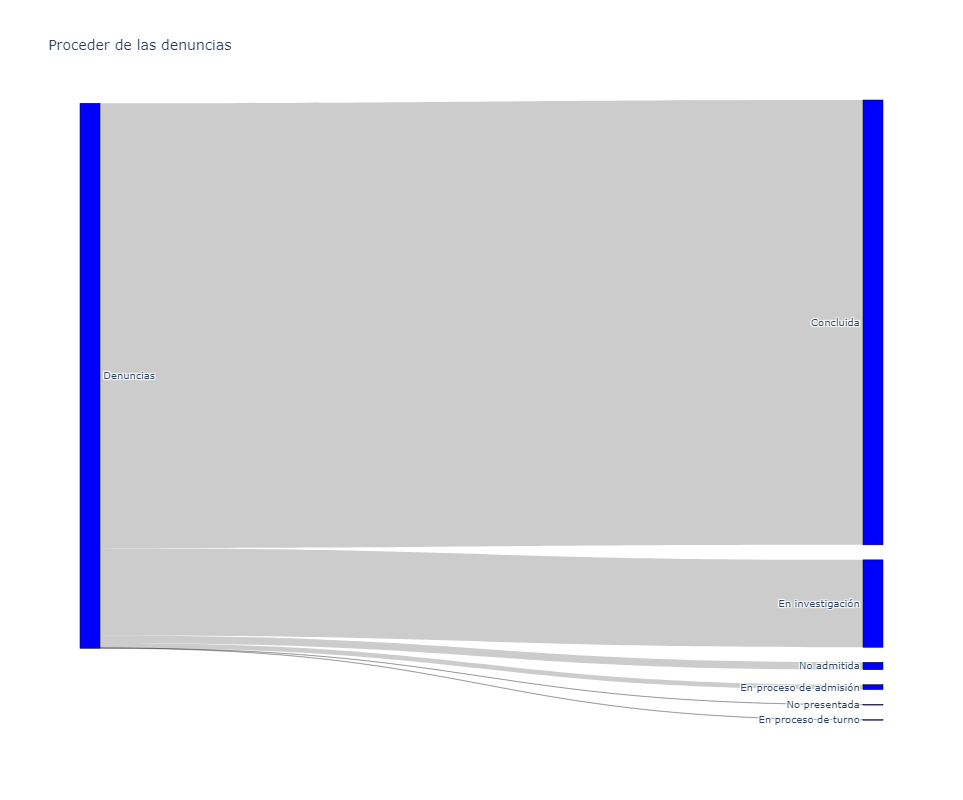

array(['Concluida', 'No admitida', 'No presentada', 'En investigación',
       'En proceso de admisión', 'En proceso de turno'], dtype=object)

In [17]:

#genera sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Denuncias', 'Concluida', 'No admitida', 'No presentada', 'En investigación',
       'En proceso de admisión', 'En proceso de turno'],
      color = "blue"
    ),
    link = dict(
      source = [0, 0, 0, 0, 0, 0], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [1, 2, 3, 4, 5, 6],
      value = [df[df['estatus']=='Concluida'].shape[0], df[df['estatus']=='No admitida'].shape[0], df[df['estatus']=='No presentada'].shape[0], 
      df[df['estatus']=='En investigación'].shape[0], df[df['estatus']=='En proceso de admisión'].shape[0], df[df['estatus']=='En proceso de turno'].shape[0]]
  ))])

fig.update_layout(title_text="Proceder de las denuncias", font_size=10, height=800)
fig.show()

df['estatus'].unique()

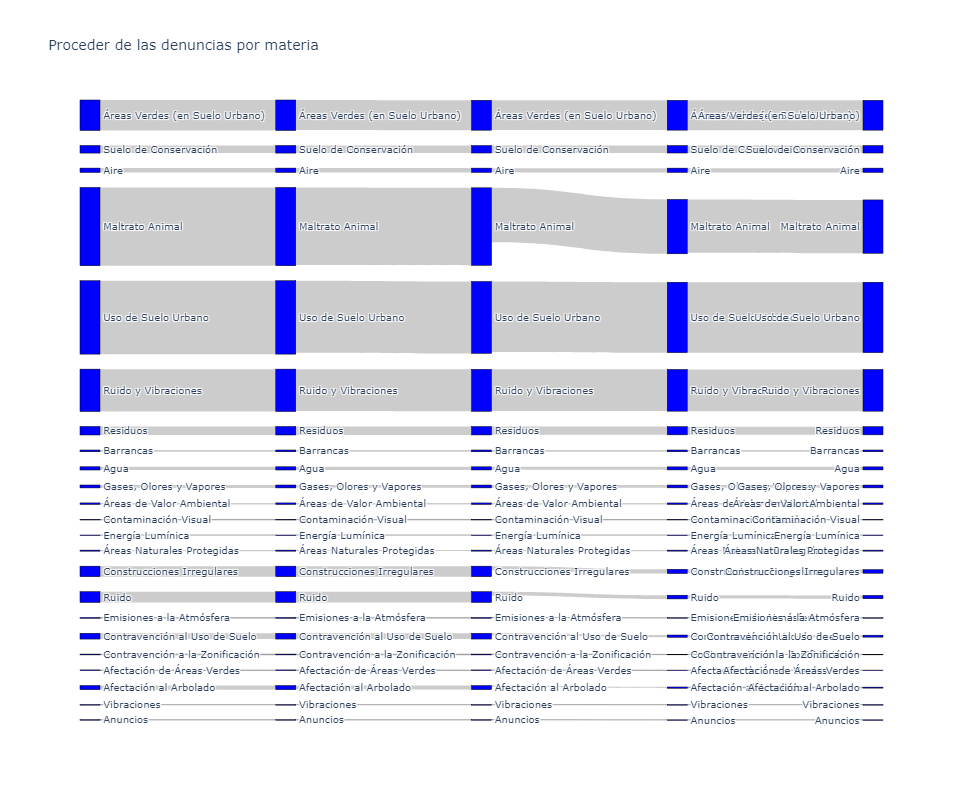

In [18]:
areas = ['Áreas Verdes (en Suelo Urbano)', 'Suelo de Conservación', 'Aire',
       'Maltrato Animal', 'Uso de Suelo Urbano', 'Ruido y Vibraciones',
       'Residuos', 'Barrancas', 'Agua', 'Gases, Olores y Vapores',
       'Áreas de Valor Ambiental', 'Contaminación Visual',
       'Energía Lumínica', 'Áreas Naturales Protegidas',
       'Construcciones Irregulares', 'Ruido', 'Emisiones a la Atmósfera',
       'Contravención al Uso de Suelo', 'Contravención a la Zonificación',
       'Afectación de Áreas Verdes', 'Afectación al Arbolado',
       'Vibraciones', 'Anuncios']

estados = ['Presentadas', 'Admitidas', 'En investigación', 'Concluidas']

#etiquetas para crear nodos en el Sankey
areas_turno = []
areas_admision = []
areas_investigacion = []
areas_conclusion = []

for v in areas:

  areas_turno.append(v)
  areas_admision.append(v)
  areas_investigacion.append(v)
  areas_conclusion.append(v)

indices = []
values = []
cu_data = []

#Indices de todos los nodos
for i in range(0,115):
  indices.append(i)


#Se restan las denuncias que no procedieron en algún momento

for a in areas:
  values.append(df[df['materia']==a].shape[0])

for a in areas:
  values.append(df[df['materia']==a].shape[0] - df[(df['materia']==a) & (df['estatus']=='No admitida')].shape[0] - df[(df['materia']==a) & (df['estatus']=='No presentada')].shape[0])

for a in areas:
  values.append(df[df['materia']==a].shape[0] - df[(df['materia']==a) & (df['estatus']=='No admitida')].shape[0] - df[(df['materia']==a) & (df['estatus']=='No presentada')].shape[0] - df[(df['materia']==a) & (df['estatus']=='En investigación')].shape[0])

for a in areas:
  values.append(df[(df['materia']==a) & (df['estatus']=='Concluida')].shape[0])




#Se genera el Sankey
fig2 = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = areas + areas_turno + areas_admision + areas_investigacion + areas_conclusion,
      color = "blue"
    ),
    link = dict(
      source = indices, 
      target = indices[23:46] + indices[46:69] + indices[69:92] + indices[92:],
      value = values,

  ))])

fig2.update_layout(title_text="Proceder de las denuncias por materia", font_size=10, height=800)
fig2.show()




Total denuncias -> Total denuncias menos las que no se presentaron o no fueron admitidas -> Total denuncias menos las que no fueron presentadas, no fueron admitidas o están en investigación -> Total denuncias menos las que no fueron presentadas o no fueron admitidas o están en investigación o están en turno o están en proceso de admisión (es decir las denuncias concluidas)

A continuación se encuentra el Sankey que hizo Álvaro López 


In [19]:
tipos_denuncia = df['materia'].unique()
lista_labels = list(tipos_denuncia)

for i in df['estatus'].unique():
    lista_labels.append(i)

fuente = []
for i in range(0,23):
    fuente.append(i)
    fuente.append(i)
    fuente.append(i)
    fuente.append(i)
    fuente.append(i)
    fuente.append(i)

objetivo = []
for l in range(0,23):
        for i in range(23,29):
            objetivo.append(i)

In [20]:
def contar(lista, nombres):
    for i in nombres:
        lista.append(df[df['materia']==i][df[df['materia']==i]['estatus']=='Concluida'].shape[0])
        lista.append(df[df['materia']==i][df[df['materia']==i]['estatus']=='No admitida'].shape[0])
        lista.append(df[df['materia']==i][df[df['materia']==i]['estatus']=='No presentada'].shape[0])
        lista.append(df[df['materia']==i][df[df['materia']==i]['estatus']=='En investigación'].shape[0])
        lista.append(df[df['materia']==i][df[df['materia']==i]['estatus']=='En proceso de admisión'].shape[0])
        lista.append(df[df['materia']==i][df[df['materia']==i]['estatus']=='En proceso de turno'].shape[0])

In [21]:
valores = []

contar(valores, df['materia'].unique())

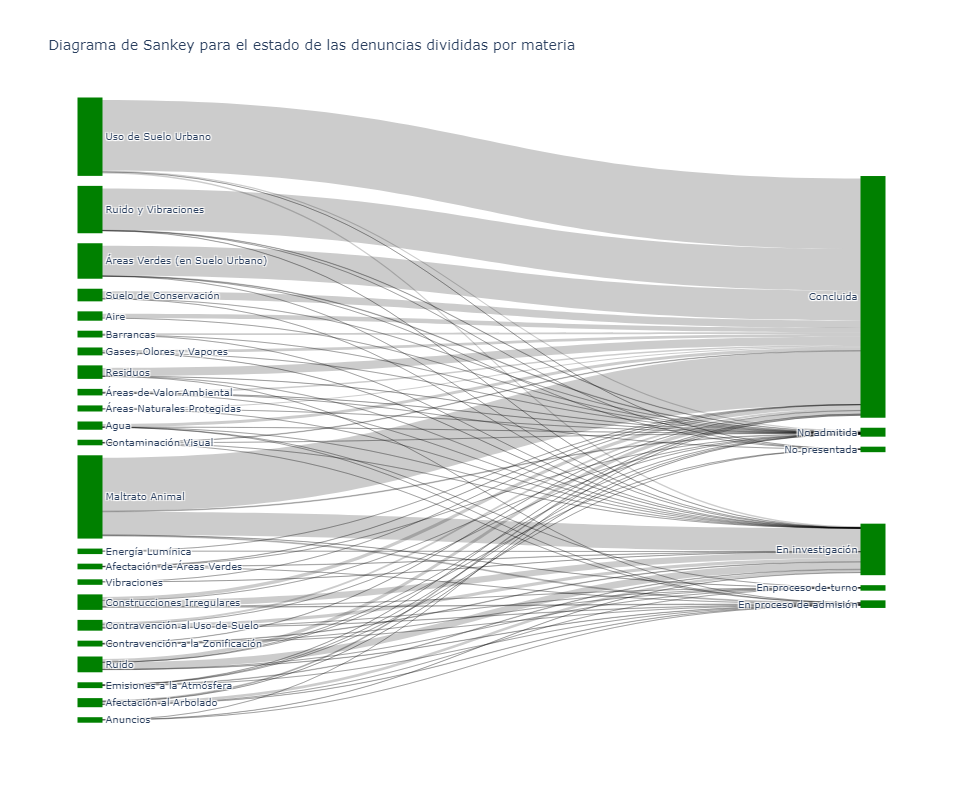

In [22]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "green", width = 5),
      label = lista_labels,
      color = "green"
    ),
    link = dict(
      source = fuente, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = objetivo,
      value = valores
  ))])

fig.update_layout(title_text="Diagrama de Sankey para el estado de las denuncias divididas por materia", font_size=10, height=800)
fig.show()